<a href="https://colab.research.google.com/github/dsliwka/EEMP2022/blob/main/notebooks/KNN2022Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
n = 300
df = pd.DataFrame(index=range(n))
df['age'] = np.random.uniform(18, 70, size = n)
df['income'] = (4*df['age']-0.04*df['age']**2 + np.random.normal(0,10,n))

In [94]:
X = df[['age']]
y = df['income']

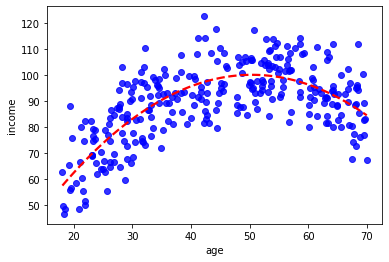

In [95]:
sns.regplot(x='age', y='income', data=df, order=2, ci=None,
            scatter_kws={'color':'blue'},
            line_kws={'color':'red', 'ls':'--'})


In [127]:
knn=KNeighborsRegressor(n_neighbors=5).fit(X,y)

y_pred= knn.predict(X)

print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))


75.78053758065235
0.6367671666680381


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


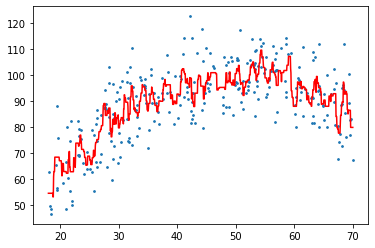

In [128]:
plt.scatter(X,y, s=3)
X_range= np.linspace(18,70,1000).reshape(-1,1)
y_range= knn.predict(X_range)
plt.plot(X_range,y_range, color="red")

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=181)

knn=KNeighborsRegressor(n_neighbors=20).fit(X_train,y_train)

print(mean_squared_error(y_test,knn.predict(X_test)))
print(r2_score(y_test,knn.predict(X_test)))


105.96566019553241
0.5385990890031624


In [110]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, random_state=181).fit(X_train, y_train)



In [111]:
print(mean_squared_error(y_test,dtree.predict(X_test)))
print(r2_score(y_test,dtree.predict(X_test)))


113.71953737919527
0.5048367740258574


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


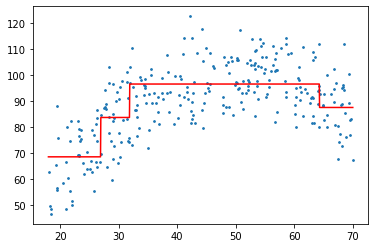

In [112]:
plt.scatter(X,y, s=3)
X_range= np.linspace(18,70,1000).reshape(-1,1)
y_range= dtree.predict(X_range)
plt.plot(X_range,y_range, color="red")

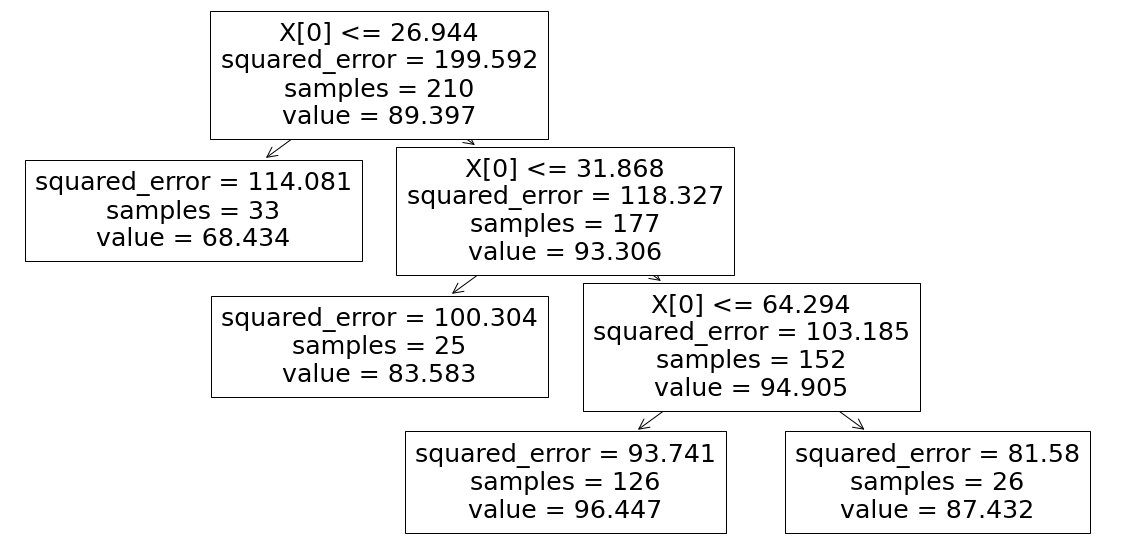

In [113]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree)
plt.show()

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(2,100,1))}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train)

print(knn_grid.best_params_)



{'n_neighbors': 21}


In [117]:
print(knn_grid.cv_results_['mean_test_score'])

[-197.27037484 -140.43690307 -124.92884382 -114.05356056 -111.12696144
 -105.67033437 -106.47397019 -105.20598012 -106.68865705 -105.9431544
 -104.2546831  -104.24863237 -103.28725191 -101.37180679 -100.92556457
 -100.73199429  -98.9144524   -98.25072516  -98.06650797  -97.18176536
  -97.01439554  -97.9159766   -98.96901335 -100.01032697 -101.20847179
 -101.32044993 -101.65378764 -102.85245582 -103.23804199 -102.87383692
 -103.049696   -103.06297507 -103.39663374 -103.0333975  -103.20432542
 -103.76567939 -103.19558954 -103.36268397 -104.11026356 -104.2857971
 -105.46673087 -106.05961558 -106.85379867 -107.76894222 -108.35518894
 -109.21367038 -110.25933412 -111.39620271 -112.11025394 -112.96390902
 -114.42666187 -114.93983401 -115.3903845  -116.83869575 -117.54709855
 -118.74196402 -119.55692327 -120.0985326  -120.89679309 -121.84320446
 -122.92532372 -123.96792531 -124.73476935 -125.34900129 -126.40907218
 -126.85253513 -127.49301093 -128.19296726 -128.93302891 -129.99993202
 -130.67

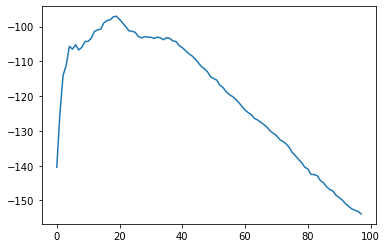

In [126]:
plt.plot(knn_grid.cv_results_['mean_test_score'])

In [122]:
print(r2_score(y_test, knn_grid.predict(X_test)))

0.5382507570352222
